# Kết nối với Drive và import các thư viện cần dùng

In [1]:
 from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [2]:
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Concatenate, BatchNormalization, AvgPool2D, Input, Activation, Dropout, GlobalAvgPool2D, add
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import numpy as np
import cv2

# Đọc data từ drive

In [3]:
from sys import path
path.append('..')
import os
from sklearn.datasets import load_breast_cancer # binaryclass
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


path_human = '/content/Drive/MyDrive/AAAJupiterNotebook/Human'
part_non_human = '/content/Drive/MyDrive/AAAJupiterNotebook/Non-Human'
# ones_human = np.ones((1, 224, 224, 3))
# ones_human = np.ones((1, 256, 256, 3))
ones_human = np.ones((1, 299, 299, 3))
for file in os.listdir(path_human):
  path_img_human = path_human+'/'+file
  # image_resize_human = cv2.resize(cv2.imread(path_img_human), (224, 224))
  # image_human = image_resize_human.reshape(1, 224, 224, 3)
  # image_resize_human = cv2.resize(cv2.imread(path_img_human), (256, 256))
  # image_human = image_resize_human.reshape(1, 256, 256, 3)
  image_resize_human = cv2.resize(cv2.imread(path_img_human), (299, 299))
  image_human = image_resize_human.reshape(1, 299, 299, 3)
  ones_human = np.concatenate((ones_human, image_human))

print(ones_human.shape)
data_human = np.delete(ones_human, 0, 0)
print(data_human.shape)

Q1, M1, N1, D1 = data_human.shape
# ones_non_human = np.ones((1, 224, 224, 3))
# ones_non_human = np.ones((1, 256, 256, 3))
ones_non_human = np.ones((1, 299, 299, 3))
for file in os.listdir(part_non_human):
  path_img_non_human = part_non_human+'/'+file
  # image_resize_non = cv2.resize(cv2.imread(path_img_non_human), (224, 224))
  # image_non_human = image_resize_non.reshape(1, 224, 224, 3)
  # image_resize_non = cv2.resize(cv2.imread(path_img_non_human), (256, 256))
  # image_non_human = image_resize_non.reshape(1, 256, 256, 3)
  image_resize_non = cv2.resize(cv2.imread(path_img_non_human), (299, 299))
  image_non_human = image_resize_non.reshape(1, 299, 299, 3)
  ones_non_human = np.concatenate((ones_non_human, image_non_human))
  
print(ones_non_human.shape)
data_non_human = np.delete(ones_non_human, 0, 0)
print(data_non_human.shape)
Q2, M2, N2, D2 = data_non_human.shape

feature_set = np.concatenate((data_human,data_non_human))

label_ones = np.ones(Q1)
label_zeros = np.zeros(Q2)
targets = np.concatenate((label_ones,label_zeros))

# print(feature_set.shape)
# print(label_ones.shape)
# print(label_zeros.shape)
# print(targets.shape)

X_train, X_test, Y_train, Y_test = train_test_split(feature_set, targets, test_size=0.2)

(121, 299, 299, 3)
(120, 299, 299, 3)
(121, 299, 299, 3)
(120, 299, 299, 3)


# Tạo model 

###VGG16

In [ ]:
#create model base on VGG16 architecture
#input_shape = 224, 224, 3
VGG16_model = Sequential()

#add model layers
VGG16_model.add(Conv2D(input_shape=(224,224,3),filters=16,kernel_size=(3,3),padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu"))
VGG16_model.add(MaxPooling2D(pool_size=(2,2),strides=2))

VGG16_model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(MaxPooling2D(pool_size=(2,2),strides=2))

VGG16_model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(MaxPooling2D(pool_size=(2,2),strides=2))

VGG16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(MaxPooling2D(pool_size=(2,2),strides=2))

VGG16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(MaxPooling2D(pool_size=(2,2),strides=2,name='vgg16'))

VGG16_model.add(Flatten(name='flatten'))
VGG16_model.add(Dense(1024, activation='relu', name='fc1'))
VGG16_model.add(Dense(1024, activation='relu', name='fc2'))
VGG16_model.add(Dense(1, activation='sigmoid', name='output'))

###VGG19

In [ ]:
# create model base on VGG19 architecture
#input_shape = 224, 224, 3
VGG19_model = Sequential()

# add model layers
VGG19_model.add(Conv2D(input_shape=(224,224,3),filters=16,kernel_size=(3,3),padding="same", activation="relu"))
VGG19_model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu"))
VGG19_model.add(MaxPooling2D(pool_size=(2,2),strides=2))

VGG19_model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
VGG19_model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
VGG19_model.add(MaxPooling2D(pool_size=(2,2),strides=2))

VGG19_model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
VGG19_model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
VGG19_model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
VGG19_model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
VGG19_model.add(MaxPooling2D(pool_size=(2,2),strides=2))

VGG19_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG19_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG19_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG19_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG19_model.add(MaxPooling2D(pool_size=(2,2),strides=2))

VGG19_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG19_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG19_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG19_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG19_model.add(MaxPooling2D(pool_size=(2,2),strides=2,name='vgg19'))

VGG19_model.add(Flatten(name='flatten'))
VGG19_model.add(Dense(1024, activation='relu', name='fc1'))
VGG19_model.add(Dense(1024, activation='relu', name='fc2'))
VGG19_model.add(Dense(1, activation='sigmoid', name='output'))

###Inception v1

In [ ]:
#create Inception v1 model
#input_shape = 224, 224, 3
def inception_v1(input_shape):
  
  def inception_block(x, f):
    t1 = Conv2D(f[0], 1, activation='relu')(x)
    
    t2 = Conv2D(f[1], 1, activation='relu')(x)
    t2 = Conv2D(f[2], 3, padding='same', activation='relu')(t2)
    
    t3 = Conv2D(f[3], 1, activation='relu')(x)
    t3 = Conv2D(f[4], 5, padding='same', activation='relu')(t3)
    
    t4 = MaxPooling2D(3, 1, padding='same')(x)
    t4 = Conv2D(f[5], 1, activation='relu')(t4)
    
    output = Concatenate()([t1, t2, t3, t4])
    return output
  
  
  input = Input(input_shape)
  
  x = Conv2D(16, 7, strides=2, padding='same', activation='relu')(input)
  x = MaxPooling2D(3, strides=2, padding='same')(x)
  
  x = Conv2D(16, 1, activation='relu')(x)
  x = Conv2D(48, 3, padding='same', activation='relu')(x)
  x = MaxPooling2D(3, strides=2)(x)
  
  x = inception_block(x, [16, 24, 32, 4, 8, 8])
  x = inception_block(x, [32, 32, 48, 8, 24, 16])
  x = MaxPooling2D(3, strides=2, padding='same')(x)  

  x = inception_block(x, [48, 24, 52, 4, 12, 16])
  #output 0
  output0 = AvgPool2D(5, strides=3, padding='same')(x)
  output0 = Conv2D(32, 1, padding='same', activation='relu')(output0)
  output0 = Flatten()(output0)
  output0 = Dense(64, activation='relu')(output0)
  output0 = Dropout(0.7, name='output0_dropout')(output0)
  output0 = Dense(1, activation='sigmoid', name='output0')(output0)
  x = inception_block(x, [40, 28, 56, 6, 16, 16])
  x = inception_block(x, [32, 32, 64, 6, 16, 16])
  x = inception_block(x, [28, 36, 72, 8, 16, 16])
  #output 1
  output1 = AvgPool2D(5, strides=3, padding='same')(x)
  output1 = Conv2D(32, 1, padding='same', activation='relu')(output1)
  output1 = Flatten()(output1)
  output1 = Dense(64, activation='relu')(output1)
  output1 = Dropout(0.7, name='output1_dropout')(output1)
  output1 = Dense(1, activation='sigmoid', name='output1')(output1)
  x = inception_block(x, [64, 40, 80, 8, 32, 32])
  x = MaxPooling2D(3, strides=2, padding='same')(x)

  x = inception_block(x, [64, 40, 80, 8, 32, 32])
  x = inception_block(x, [96, 48, 96, 12, 32, 32])
  
  output2 = AvgPool2D(7, strides=1)(x)
  output2 = Dropout(0.4, name='output2_dropout')(output2)  
  output2 = Flatten()(output2)
  output2 = Dense(1, activation='sigmoid', name='output2')(output2)
  
  model0 = Model(input, output0)
  model1 = Model(input, output1)
  model2 = Model(input, output2)
  return model0, model1, model2

###Inception v2

In [4]:
#create Inception v2 model
#input_shape = 299, 299, 3
# link: https://www.programmersought.com/article/90163515785/, https://www.programmersought.com/article/89957079827/

def inception_v2(input_shape):
  
  def inception_block_35(x, f):
    t1 = Conv2D(f[0], 1, activation='relu')(x)
    
    t2 = Conv2D(f[1], 1, activation='relu')(x)
    t2 = Conv2D(f[2], 3, padding='same', activation='relu')(t2)
    
    t3 = Conv2D(f[3], 1, activation='relu')(x)
    t3 = Conv2D(f[4], 3, padding='same', activation='relu')(t3)
    t3 = Conv2D(f[5], 3, padding='same', activation='relu')(t3)
    
    t4 = MaxPooling2D(3, 1, padding='same')(x)
    t4 = Conv2D(f[6], 1, activation='relu')(t4)
    
    output = Concatenate()([t1, t2, t3, t4])
    return output

  def inception_block_17(x, f):
    t1 = Conv2D(f[0], 1, activation='relu')(x)
    
    t2 = Conv2D(f[1], 1, activation='relu')(x)
    t2 = Conv2D(f[2], kernel_size=(1,3), padding='same', activation='relu')(t2)
    t2 = Conv2D(f[3], kernel_size=(3,1), padding='same', activation='relu')(t2)
    
    t3 = Conv2D(f[3], 1, activation='relu')(x)
    t3 = Conv2D(f[4], kernel_size=(1,3), padding='same', activation='relu')(t3)
    t3 = Conv2D(f[5], kernel_size=(3,1), padding='same', activation='relu')(t3)
    t3 = Conv2D(f[6], kernel_size=(1,3), padding='same', activation='relu')(t3)
    t3 = Conv2D(f[7], kernel_size=(3,1), padding='same', activation='relu')(t3)
    
    t4 = MaxPooling2D(3, 1, padding='same')(x)
    t4 = Conv2D(f[8], 1, activation='relu')(t4)
    
    output = Concatenate()([t1, t2, t3, t4])
    return output

  def inception_block_8(x, f):
    t1 = Conv2D(f[0], 1, activation='relu')(x)
    
    t2 = Conv2D(f[1], 1, activation='relu')(x)
    t21 = Conv2D(f[2], kernel_size=(1,3), padding='same', activation='relu')(t2)
    t22 = Conv2D(f[3], kernel_size=(3,1), padding='same', activation='relu')(t2)
    
    t3 = Conv2D(f[4], 1, activation='relu')(x)
    t3 = Conv2D(f[5], kernel_size=(3,3), padding='same', activation='relu')(t3)
    t31 = Conv2D(f[6], kernel_size=(1,3), padding='same', activation='relu')(t3)
    t32 = Conv2D(f[7], kernel_size=(3,1), padding='same', activation='relu')(t3)
    
    t4 = MaxPooling2D(3, 1, padding='same')(x)
    t4 = Conv2D(f[8], 1, activation='relu')(t4)
    
    output = Concatenate()([t1, t21, t22, t31, t32, t4])
    return output
  

  input = Input(input_shape)
  
  x = Conv2D(16, 7, strides=2, padding='same', activation='relu')(input)
  x = MaxPooling2D(3, strides=2, padding='same')(x)
  
  x = Conv2D(16, 1, activation='relu')(x)
  x = Conv2D(48, 3, padding='same', activation='relu')(x)
  x = MaxPooling2D(3, strides=2)(x)
  
  x = inception_block_35(x, [16, 24, 32, 4, 8, 8, 8])
  x = inception_block_35(x, [32, 32, 32, 8, 24, 24, 64])
  x = inception_block_35(x, [16, 32, 16, 16, 24, 24, 8])
  x = MaxPooling2D(3, strides=2, padding='same')(x)
  
  x = inception_block_17(x, [48, 24, 52, 52, 4, 12, 12, 12, 12, 16])
  #output 0
  output0 = AvgPool2D(5, strides=3, padding='same')(x)
  output0 = Conv2D(32, 1, padding='same')(output0)
  output0 = BatchNormalization()(output0)
  output0 = Activation('relu')(output0)
  output0 = Flatten()(output0)
  output0 = Dense(64)(output0)
  output0 = BatchNormalization()(output0)
  output0 = Activation('relu')(output0)
  output0 = Dropout(0.7, name='output0_dropout')(output0)
  output0 = Dense(1, activation='sigmoid', name='output0')(output0)
  x = inception_block_17(x, [40, 28, 56, 56, 6, 16, 16, 16, 16, 16])
  x = inception_block_17(x, [32, 32, 64, 64, 6, 16, 16, 16, 16, 16])
  x = inception_block_17(x, [28, 36, 72, 72, 8, 16, 16, 16, 16, 16])
  #output 1
  output1 = AvgPool2D(5, strides=3, padding='same')(x)
  output1 = Conv2D(32, 1, padding='same')(output1)
  output1 = BatchNormalization()(output1)
  output1 = Activation('relu')(output1)
  output1 = Flatten()(output1)
  output1 = Dense(64)(output1)
  output1 = BatchNormalization()(output1)
  output1 = Activation('relu')(output1)
  output1 = Dropout(0.7, name='output1_dropout')(output1)
  output1 = Dense(1, activation='sigmoid', name='output1')(output1)
  x = inception_block_17(x, [64, 40, 80, 80, 8, 32, 32, 32, 32, 32])
  x = MaxPooling2D(3, strides=2, padding='same')(x)


  x = inception_block_8(x, [64, 40, 80, 80, 8, 32, 32, 32, 32])
  x = inception_block_8(x, [96, 48, 96, 96, 12, 32, 32, 32, 32])
  
  output2 = AvgPool2D(7, strides=1)(x)
  output2 = Dropout(0.4, name='output2_dropout')(output2)
  
  output2 = Flatten()(output2)
  output2 = Dense(1, activation='sigmoid', name='output2')(output2)
  
  model0 = Model(input, output0)
  model1 = Model(input, output1)
  model2 = Model(input, output2)
  return model0, model1, model2

###Darknet19

In [ ]:
#create Darknet19 model
# input_shape = [224, 224, 3]

def darknet19(input_shape):
  def convolutional(x, filters, kernels, strides=1):
    x = Conv2D(filters, kernels, padding='same', strides=strides, activation='linear', kernel_regularizer=l2(5e-4))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    return x

  def block_1(x, f):
    # t=Conv2D(f, 3, strides=1, padding='same', activation='relu')(x)
    t=convolutional(x, f, 3)
    t=MaxPooling2D(2, strides=2)(t)
    return t

  def block_2(x,f):
    # t=Conv2D(f[0], 3, padding='same', activation='relu')(x)
    # t=Conv2D(f[1], 1, padding='same', activation='relu')(t)
    # t=Conv2D(f[0], 3, padding='same', activation='relu')(t)
    t=convolutional(x, f[0], 3)
    t=convolutional(t, f[1], 1)
    t=convolutional(t, f[0], 3)
    t=MaxPooling2D(2, strides=2)(t)
    return t
    
  def block_3(x, f):
    # t=Conv2D(f[0], 3, padding='same', activation='relu')(x)
    # t=Conv2D(f[1], 1, padding='same', activation='relu')(t)
    # t=Conv2D(f[0], 3, padding='same', activation='relu')(t)
    # t=Conv2D(f[1], 1, padding='same', activation='relu')(t)
    # t=Conv2D(f[0], 3, padding='same', activation='relu')(t)
    t=convolutional(x, f[0], 3)
    t=convolutional(t, f[1], 1)
    t=convolutional(t, f[0], 3)
    t=convolutional(t, f[1], 1) 
    t=convolutional(t, f[0], 3)
    return t
  
  input = Input(input_shape)    
 
  x=block_1(input, 8)
  x=block_1(x, 16)
  
  x=block_2(x, [32, 16])
  x=block_2(x, [64, 32])
  
  x=block_3(x, [128, 64])
  x=MaxPooling2D(2, strides=2)(x)
  x=block_3(x, [256, 128])
  # x=Conv2D(250, 1, padding='same', activation='relu')(x)
  x=convolutional(x, 250, 1)
  x=GlobalAvgPool2D()(x)
  x=Flatten()(x)
  # x=Dense(1, activation='sigmoid', name='output_Darknet19')(x)
  x=Dense(1)(x)
  x= Activation('sigmoid')(x)

  model = Model(input, x)
  return model

###Darknet53 

In [ ]:
#create Darknet53 model
# input_shape = [256, 256, 3]

def darknet53(input_shape):
  def convolutional(x, filters, kernels, strides=1):
      x = Conv2D(filters, kernels, padding='same', strides=strides, activation='linear', kernel_regularizer=l2(5e-4))(x)
      x = BatchNormalization()(x)
      x = LeakyReLU(alpha=0.1)(x)
      return x

  def residual_block(inputs, filters):
      x = convolutional(inputs, filters, (1, 1))
      x = convolutional(x, 2 * filters, (3, 3))
      x = add([inputs, x])
      x = Activation('linear')(x)
      return x

  input = Input(input_shape)
  x = convolutional(input, 8, (3, 3))

  x = convolutional(x, 16, (3, 3), strides=2)
  x = residual_block(x, 8)

  x = convolutional(x, 32, (3, 3), strides=2)
  x = residual_block(x, 16)
  x = residual_block(x, 16)

  x = convolutional(x, 64, (3, 3), strides=2)
  for i in range(8):
    x = residual_block(x, 32)

  x = convolutional(x, 128, (3, 3), strides=2)
  for i in range(8):
    x = residual_block(x, 64)

  x = convolutional(x, 256, (3, 3), strides=2)
  for i in range(4):
    x = residual_block(x, 128)

  x = GlobalAvgPool2D()(x)
  x = Dense(1, activation='sigmoid')(x)

  model = Model(input, x)
  return model

# Định nghĩa các hàm cần dùng

In [5]:
def summary(model):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

In [6]:
def graphing(history):
    # ['accuracy', 'loss', 'val_accuracy', 'val_loss']
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

# Print and Train model

###Train VGG16

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 64)        1

No handles with labels found to put in legend.


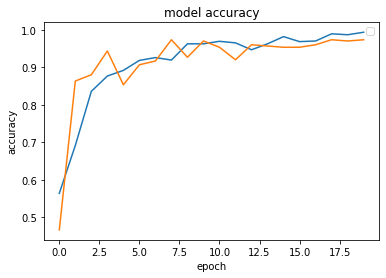

No handles with labels found to put in legend.


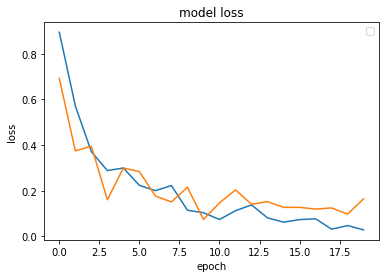

In [ ]:
# training by VGG16
summary(VGG16_model)
history16 = VGG16_model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=20, batch_size = 32)
graphing(history16)

###Train VGG19

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 64)        1

No handles with labels found to put in legend.


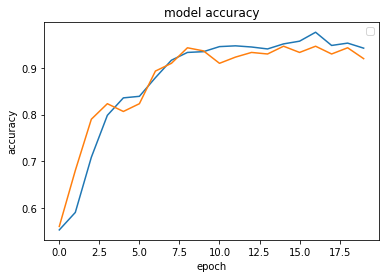

No handles with labels found to put in legend.


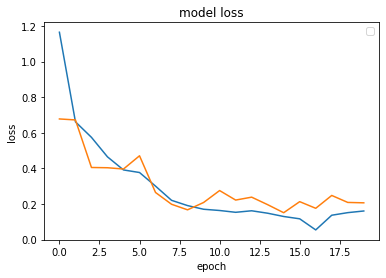

In [ ]:
# training by VGG19
summary(VGG19_model)
history19 = VGG19_model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=20, batch_size=32)
graphing(history19)

###Train Inception v1

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 16) 2368        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 56, 56, 16)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 56, 56, 16)   272         max_pooling2d[0][0]              
____________________________________________________________________________________________

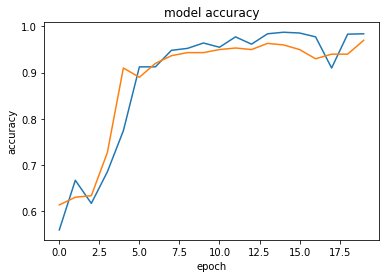

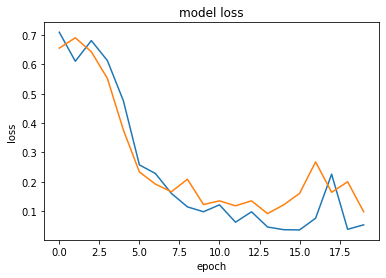

In [ ]:
# train by Inception v1
input_shape = 224, 224, 3
m10, m11, inception_v1_model = inception_v1(input_shape)
summary(inception_v1_model)
history_inception_v1 = inception_v1_model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=20, batch_size=32)
graphing(history_inception_v1)

Output 0
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, 112, 112, 16) 2368        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 56, 56, 16)   0           conv2d_59[0][0]                  
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 56, 56, 16)   272         max_pooling2d_13[0][0]           
___________________________________________________________________________________

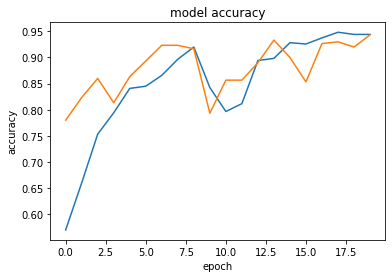

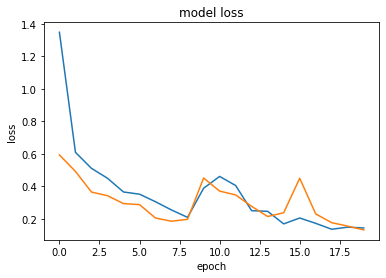

Output 1
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, 112, 112, 16) 2368        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 56, 56, 16)   0           conv2d_59[0][0]                  
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 56, 56, 16)   272         max_pooling2d_13[0][0]           
___________________________________________________________________________________

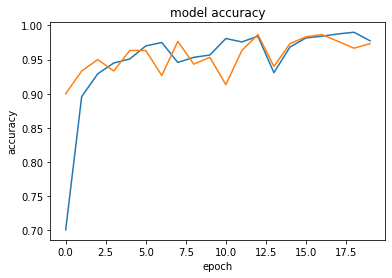

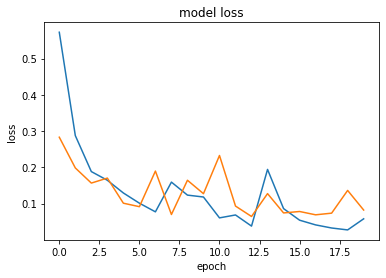

In [ ]:
input_shape = 224, 224, 3
m10, m11, inception_v1_model = inception_v1(input_shape)
print('Output 0')
summary(m10)
history_m10 = m10.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=20, batch_size=32)
graphing(history_m10)
print('Output 1')
summary(m11)
history_m11 = m11.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=20, batch_size=32)
graphing(history_m11)

###Train Inception v2

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 150, 150, 16) 2368        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 75, 75, 16)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 75, 75, 16)   272         max_pooling2d[0][0]              
____________________________________________________________________________________________

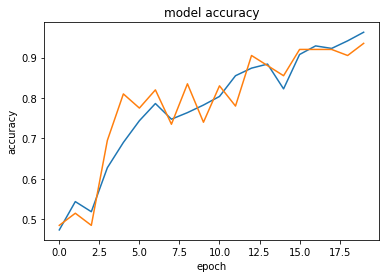

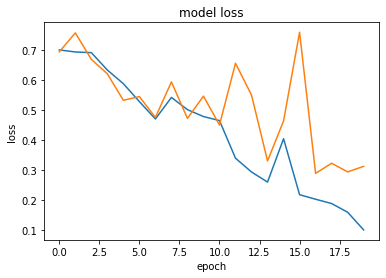

In [ ]:
# train by Inception v2
input_shape = 299, 299, 3
m20, m21, inception_v2_model = inception_v2(input_shape)
summary(inception_v2_model)
history_inception_v2 = inception_v2_model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=20, batch_size=32)
graphing(history_inception_v2)

In [ ]:
SVG(model_to_dot(inception_v1_model).create(prog='dot', format='svg'))

Output 0
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 150, 150, 16) 2368        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 75, 75, 16)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 75, 75, 16)   272         max_pooling2d[0][0]              
_____________________________________________________________________________________

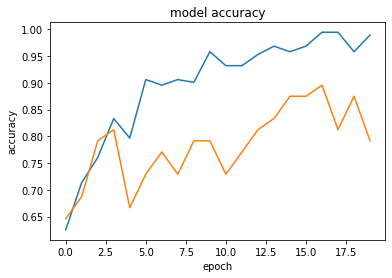

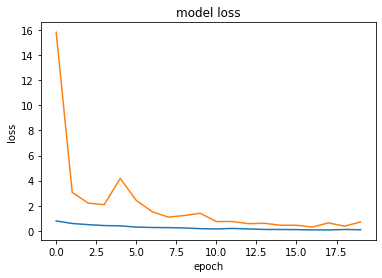

In [7]:
input_shape = 299, 299, 3
m20, m21, inception_v2_model = inception_v2(input_shape)
print('Output 0')
summary(m20)
history_m20 = m20.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=20, batch_size=32)
graphing(history_m20)

Output 1
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 150, 150, 16) 2368        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 75, 75, 16)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 75, 75, 16)   272         max_pooling2d[0][0]              
___________________________________________________________________________________

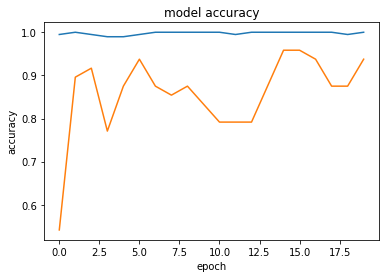

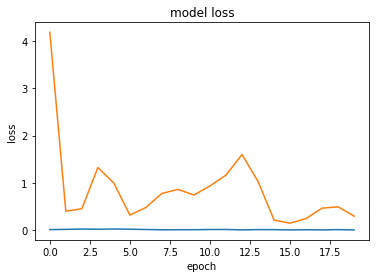

In [14]:
print('Output 1')
summary(m21)
history_m21 = m21.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=20, batch_size=32)
graphing(history_m21)

###Train Darknet19

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_675 (Conv2D)          (None, 224, 224, 8)       224       
_________________________________________________________________
batch_normalization_19 (Batc (None, 224, 224, 8)       32        
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 224, 224, 8)       0         
_________________________________________________________________
max_pooling2d_179 (MaxPoolin (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_676 (Conv2D)          (None, 112, 112, 16)      1168      
_________________________________________________________________
batch_normalization_20 (Batc (None, 112, 112, 16)      64 

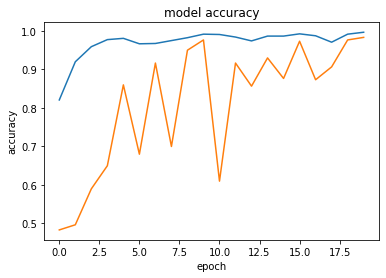

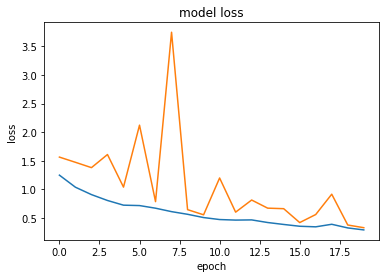

In [ ]:
# train by Darknet19
input_shape = 224, 224, 3
darknet19_model = darknet19(input_shape)
summary(darknet19_model)
history_darknet19 = darknet19_model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=20, batch_size=32)
graphing(history_darknet19)

###Train Darknet53

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_52 (Conv2D)              (None, 256, 256, 8)  224         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_52 (BatchNo (None, 256, 256, 8)  32          conv2d_52[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_52 (LeakyReLU)      (None, 256, 256, 8)  0           batch_normalization_52[0][0]     
____________________________________________________________________________________________

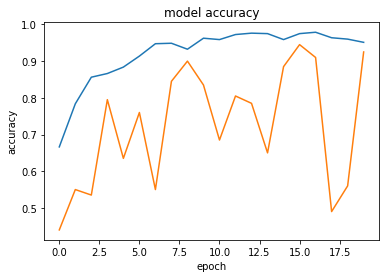

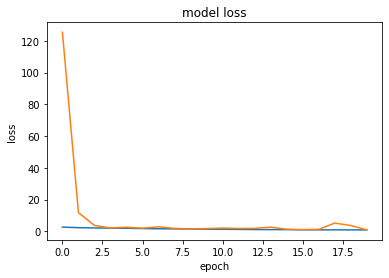

In [ ]:
# train by Darknet19
input_shape = 256, 256, 3
darknet53_model = darknet53(input_shape)
summary(darknet53_model)
history_darknet53 = darknet53_model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=20, batch_size=32)
graphing(history_darknet53)

#Áp dụng các model đã train vào video

In [ ]:
subtractor = cv2.createBackgroundSubtractorMOG2(history=20, varThreshold=25, detectShadows=False)
cap = cv2.VideoCapture('/content/Drive/MyDrive/AAAJupiterNotebook/video.mp4')

fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
out = cv2.VideoWriter("/content/Drive/MyDrive/AAAJupiterNotebook/Task9/output_darknet53.avi", fourcc, 30.0, (1280, 720))
if not cap.isOpened:
    print('Không thể mở video')
    exit(0)
while cap.isOpened:
    ret, frame = cap.read()
    if ret != True:
        break
    rs = frame.copy()
    result = rs.copy()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    mask = subtractor.apply(blur)
    kernel = np.ones((5, 5), np.uint8)
    threshold = cv2.dilate(mask, kernel)
    _, threshold = cv2.threshold(threshold, 70, 255, cv2.THRESH_BINARY)
    mask = cv2.GaussianBlur(threshold, (3, 3), 0)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        if cv2.contourArea(cnt)  > 500 :
            (x, y, w, h) = cv2.boundingRect(cnt)
            x1 = int(x + w / 2)
            y1 = int(y + h / 2)
            img_crop = cv2.getRectSubPix(rs, (w, h), (x1, y1))
            # img_crop_gray = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)
            # img_temp = cv2.resize(img_crop, (224, 224))
            img_temp = cv2.resize(img_crop, (256, 256))
            # img_temp = cv2.resize(img_crop, (299, 299))
            # img_input = img_temp.reshape(64, 64, 1)
            data_input = np.expand_dims(img_temp, axis=0)


            Y_box_pred = darknet53_model.predict(data_input)
            

            if Y_box_pred>0.5:
                 result = cv2.rectangle(rs, (x, y), (x + w, y + h), (0, 255, 0), 2)
                 cv2.putText(result, "Human", (x, y - 10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
            else :
                result = cv2.rectangle(rs, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(result, "Non", (x, y - 10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 255), 2)
    image = cv2.resize(result, (1280, 720))
    out.write(image)

    key = cv2.waitKey(30) & 0xff
    if key == 27:
        break
cv2.destroyAllWindows()
cap.release()
out.release()

In [ ]:
!find . -print| wc -l

1827


In [ ]:
!find . -print| wc -l

1859
